In [30]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

# Part 1 - Complex Numbers in Python

In [31]:
3 + 2j

(3+2j)

In [32]:
a = 3
b = 3 
z = a+b*1j

In [33]:
print('z = ', z)
print('The type of variable is ', type(z))

z =  (3+3j)
The type of variable is  <class 'complex'>


In [34]:
#Exercises with complex-number operations 

x = (2.75 + 3.69j)*(8.55 - 6.13j)
y = 1.4*numpy.exp(5.32j)
z = (7.51-9.15j)/(4.43 + 9.64j)

print('x = ',x,'y = ',y,'z = ',z)

x =  (46.1322+14.692000000000004j) y =  (0.799270785858-1.1494199454j) z =  (-0.4880897698448308-1.0033441577191493j)


# Part 2- Shapes created by the Joukowski transformation:

In [35]:
def joukowski_transform(z, c):
    xi = z + (c**2 / z)
    return xi

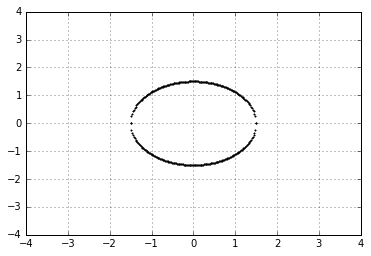

In [36]:
N = 150
x_start, x_end = -4.0, 4.0
y_start, y_end = -4.0, 4.0
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X,Y = numpy.meshgrid(x,y)

c = 1.0
r = 1.5
x0, y0 = 0,0

x = numpy.linspace(-r, r, N)
y_circle_pos = numpy.sqrt(r**2 - (x**2))
y_circle_neg = -numpy.sqrt(r**2 - (x**2))

x_circle = numpy.concatenate([x,x])
y_circle = numpy.concatenate([y_circle_pos, y_circle_neg])
xy = numpy.vstack((x_circle, y_circle))
z = numpy.empty_like(xy, dtype=complex)
z.real = xy[0,:]
z.imag = xy[1,:]

pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
#pyplot.scatter(x_circle, y_circle)
#pyplot.scatter(x_circle, y_circle_neg)
#pyplot.scatter(x_circle, y_circle_pos)
pyplot.scatter(z.real, z.imag, s=0.5)

pyplot.grid(True)

#print(x_circle.size)
#print(y_circle.size)

#print(x_circle)
#print(y_circle)

#print(x.size)
#print(y_circle_pos.size)
#print(xy)
#print(z)

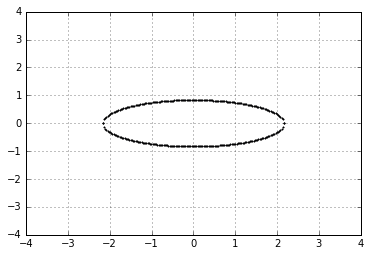

In [37]:
xi = joukowski_transform(z, c)

size=10
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.grid(True)
pyplot.scatter(xi.real, xi.imag, s=0.5)

The shape looks like an ellipse

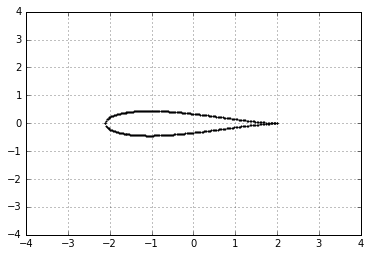

In [38]:
#Radius of the circle = 1.2; centered at xc, yc = c-R, 0

c = 1.0
r = 1.2
x0, y0 = c-r,0

x = numpy.linspace(-r, r, N)+x0
y_circle_pos = numpy.sqrt(r**2 - ((x-x0)**2))
y_circle_neg = -numpy.sqrt(r**2 - ((x-x0)**2))

x_circle = numpy.concatenate([x,x])
y_circle = numpy.concatenate([y_circle_pos, y_circle_neg])
xy = numpy.vstack((x_circle, y_circle))
z = numpy.empty_like(xy, dtype=complex)
z.real = xy[0,:]
z.imag = xy[1,:]

xi = joukowski_transform(z, c)

size=10
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.grid(True)
pyplot.scatter(xi.real, xi.imag, s=0.5)

The shape looks like a symmetric airfoil

/Users/alexabaumer/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in sqrt
/Users/alexabaumer/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in sqrt


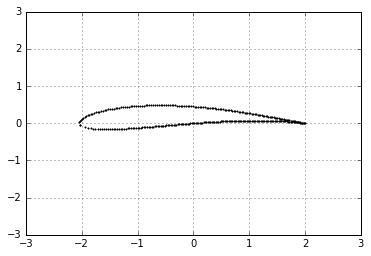

In [39]:
#Circle at xc,yc = 0.1, 0.1 and radius is R = ((c-xc)**2 + yc**2)^0.5

c = 1.0
x0, y0 = 0.1,0.1
r = numpy.sqrt((c-x0)**2 + y0**2)

x = numpy.linspace(-r, r, N)+x0
y_circle_pos = numpy.sqrt(r**2 - ((x-x0)**2))+y0
y_circle_neg = -numpy.sqrt(r**2 - ((x-x0)**2))+y0

x_circle = numpy.concatenate([x,x])
y_circle = numpy.concatenate([y_circle_pos, y_circle_neg])
xy = numpy.vstack((x_circle, y_circle))
z = numpy.empty_like(xy, dtype=complex)
z.real = xy[0,:]
z.imag = xy[1,:]

xi = joukowski_transform(z, c)

size=10
pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)
pyplot.grid(True)
pyplot.scatter(xi.real, xi.imag, s=0.5)

#print(y_circle_pos)
#print(y_circle_neg)

The shape looks like a cambered airfoil

The point on the circle which corresponds to the trailing edge of the airfoil would be theta = 0

## Part 3 - Grid points on the z plane using polar coordinates

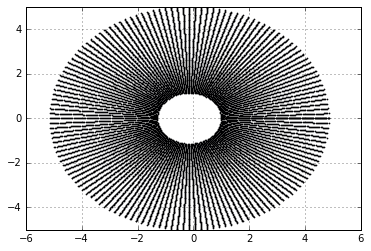

In [42]:
n_r = 100 
n_theta = 145 

R = 1.15
c = 1.0
x0, y0 = -0.15, 0

r = numpy.linspace(R, 5, n_r)
theta = numpy.linspace(0, 2*math.pi, n_theta)
r, theta = numpy.meshgrid(r, theta)
#z = R * numpy.exp(1j*THETA)

xr = (numpy.cos(theta)*r)+x0
yr = (numpy.sin(theta)*r)+y0
z = numpy.empty_like(xr, dtype=complex)
z.real = xr
z.imag = yr

size=10
pyplot.xlim(-6.0, 6.0)
pyplot.ylim(-5.0, 5.0)
pyplot.grid(True)
pyplot.scatter(z.real, z.imag, s=0.5)

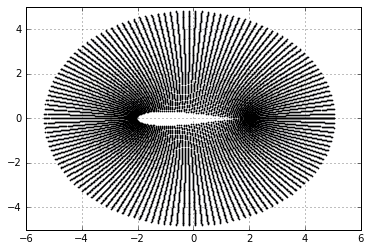

In [41]:
xi = joukowski_transform(z, c)

pyplot.xlim(-6.0, 6.0)
pyplot.ylim(-5.0, 5.0)
pyplot.grid(True)
pyplot.scatter(xi.real, xi.imag, s=0.5)

## Part 4- flow over a symmetric Joukowski airfoil with zero angle of attack

In [43]:
def velocity_doublet(strength, xd, yd, X, Y):

    u_d = -strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v_d = -strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    
    return u_d,v_d

In [44]:
def streamfx_doublet(strength, xd, yd, X, Y):
 
    psi_d = -strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi_d

In [50]:
def velocity_fs(u_inf, Nx, Ny):
    
    u_fs = u_inf * numpy.ones((Nx, Ny), dtype=float)
    v_fs = numpy.zeros((Nx, Ny), dtype=float)
    
    return u_fs, v_fs

In [51]:
def streamfx_fs(u_inf, Y):
    
    psi_fs = u_inf * Y
    
    return psi_fs

In [53]:
u_inf = 1.0 
strength = (r**2)*2*math.pi*u_inf

u_d, v_d = velocity_doublet(strength, x0, y0, xr, yr)
psi_d = streamfx_doublet(strength, x0, y0, xr, yr)

u_fs, v_fs = velocity_fs(u_inf, n_r, n_theta)
psi_fs = streamfx_fs(u_inf, yr)

u = u_d + u_fs
v = v_d + v_fs
psi = psi_d + psi_fs

ValueError: operands could not be broadcast together with shapes (145,100) (100,145) 